In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [25]:
data = pd.read_csv('Arrest_Data.csv')
data.head(5)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,4248313,02/24/2015,1310.0,20.0,Olympic,2022.0,37.0,M,H,5.0,Burglary,F,459PC,BURGLARY,5TH,WILTON,"(34.0653, -118.314)"
1,191811472,05/03/2019,1700.0,18.0,Southeast,1802.0,23.0,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
2,4254777,02/26/2015,2010.0,19.0,Mission,1985.0,22.0,M,H,6.0,Larceny,M,459.5PC,SHOPLIFTING,8300 VAN NUYS BL,NaN,"(34.2216, -118.4488)"
3,5614161,04/29/2019,1040.0,8.0,West LA,842.0,41.0,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
4,5615197,04/30/2019,615.0,6.0,Hollywood,663.0,27.0,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227521 entries, 0 to 1227520
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Report ID                 1227521 non-null  object 
 1   Arrest Date               1227517 non-null  object 
 2   Time                      1227322 non-null  float64
 3   Area ID                   1227517 non-null  float64
 4   Area Name                 1227517 non-null  object 
 5   Reporting District        1227517 non-null  float64
 6   Age                       1227517 non-null  float64
 7   Sex Code                  1227517 non-null  object 
 8   Descent Code              1227517 non-null  object 
 9   Charge Group Code         1139951 non-null  float64
 10  Charge Group Description  1139515 non-null  object 
 11  Arrest Type Code          1227516 non-null  object 
 12  Charge                    1227516 non-null  object 
 13  Charge Description        1

### Data Cleaning

In [27]:
to_drop =['Charge Group Code','Charge Description','Cross Street']
data.drop(columns=to_drop,axis=1,inplace=True)
data.head(20)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Description,Arrest Type Code,Charge,Address,Location
0,4248313,02/24/2015,1310.0,20.0,Olympic,2022.0,37.0,M,H,Burglary,F,459PC,5TH,"(34.0653, -118.314)"
1,191811472,05/03/2019,1700.0,18.0,Southeast,1802.0,23.0,F,B,NaN,M,653.22 PC,91ST,"(33.9543, -118.2827)"
2,4254777,02/26/2015,2010.0,19.0,Mission,1985.0,22.0,M,H,Larceny,M,459.5PC,8300 VAN NUYS BL,"(34.2216, -118.4488)"
3,5614161,04/29/2019,1040.0,8.0,West LA,842.0,41.0,M,H,Robbery,F,211PC,11600 WILSHIRE BL,"(34.0508, -118.4592)"
4,5615197,04/30/2019,615.0,6.0,Hollywood,663.0,27.0,M,O,Burglary,F,459PC,LA BREA,"(34.0907, -118.3384)"
5,5615701,04/30/2019,1100.0,9.0,Van Nuys,901.0,2.0,F,H,NaN,D,300(B)WIC,RAYMER,"(34.2149, -118.4674)"
6,4256466,02/28/2015,1430.0,18.0,Southeast,1824.0,22.0,M,B,Burglary,F,459PC,103RD,"(33.947, -118.2594)"
7,4256564,02/28/2015,1715.0,10.0,West Valley,1039.0,16.0,M,H,Robbery,F,211PC,VANOWEN,"(34.1939, -118.4836)"
8,5616892,05/01/2019,1710.0,12.0,77th Street,1245.0,28.0,F,B,Robbery,F,211PC,VERMONT,"(33.9746, -118.2918)"
9,5617003,05/01/2019,1010.0,16.0,Foothill,1601.0,39.0,M,H,NaN,O,21 841A1US,FOOTHILL BL,"(34.2868, -118.4081)"


In [28]:
data['Arrest Date']= data['Arrest Date'].fillna(data['Arrest Date'].min)
data['Area Name']= data['Area Name'].fillna(data['Area Name'].min)
data['Reporting District']= data['Reporting District'].fillna(data['Reporting District'].min)
data['Charge Group Description']= data['Charge Group Description'].dropna()
data['Time']= data['Time'].interpolate()
data = data.dropna()
data['Charge Group Description'].isnull().sum()

0

In [29]:
data.isnull().sum()

Report ID                   0
Arrest Date                 0
Time                        0
Area ID                     0
Area Name                   0
Reporting District          0
Age                         0
Sex Code                    0
Descent Code                0
Charge Group Description    0
Arrest Type Code            0
Charge                      0
Address                     0
Location                    0
dtype: int64

In [30]:
data['Arrest Date'] = pd.to_datetime(data['Arrest Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139514 entries, 0 to 1227515
Data columns (total 14 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Report ID                 1139514 non-null  object        
 1   Arrest Date               1139514 non-null  datetime64[ns]
 2   Time                      1139514 non-null  float64       
 3   Area ID                   1139514 non-null  float64       
 4   Area Name                 1139514 non-null  object        
 5   Reporting District        1139514 non-null  object        
 6   Age                       1139514 non-null  float64       
 7   Sex Code                  1139514 non-null  object        
 8   Descent Code              1139514 non-null  object        
 9   Charge Group Description  1139514 non-null  object        
 10  Arrest Type Code          1139514 non-null  object        
 11  Charge                    1139514 non-null  object

In [31]:
data['year'] = data['Arrest Date'].dt.year
data['month'] = data['Arrest Date'].dt.month

In [32]:
#creation of datasets
data_2010to2018=data[(data['year']>=2010) & (data['year']<=2018) ]
new_datasets= data[data['year']==2018]

#### Q1. How many bookings of arrestees were made in 2018? 

In [33]:
new_datasets['Report ID'].count()

30332

#### Q2.How many bookings of arrestees were made in the area with the most arrests in 2018?

In [34]:
new_datasets.groupby('Area Name')['Report ID'].count().reset_index().sort_values('Report ID',ascending=False).head(10)

,Area Name,Report ID
1,Central,5011
6,Hollywood,2798
13,Rampart,1935
12,Pacific,1700
17,Van Nuys,1532
9,Newton,1490
15,Southwest,1424
4,Harbor,1355
0,77th Street,1303
10,Northeast,1299


#### Q3.There are differences between the average age of an arrestee for the various charge groups. Find the average age of arrestees per each charge group.

In [35]:
new_datasets.groupby('Charge Group Description')['Age'].mean().reset_index().sort_values('Age',ascending=False).drop(index=[19,17])

,Charge Group Description,Age
6,Drunkeness,44.219972
13,Liquor Laws,42.540955
3,Disorderly Conduct,41.924290
10,Gambling,40.557047
4,Disturbing the Peace,39.727273
0,Against Family/Child,36.950355
24,Sex (except rape/prst),36.555838
14,Miscellaneous Other Violations,36.252076
21,Rape,36.203704
16,Narcotic Drug Laws,36.097954


#### Q4 What is the 95% quantile of the age of the arrestee in 2018? Only consider the following charge groups for your analysis

In [36]:
columns= ['Vehicle Theft' ,
'Robbery',
'Burglary',
'Receive Stolen Property']
my_quantile = new_datasets[new_datasets['Charge Group Description'].isin(columns)]['Age'].quantile(0.95)
my_quantile

52.0

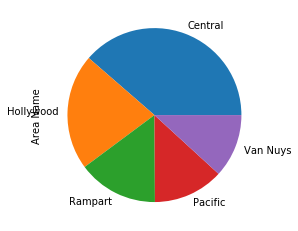

In [37]:
new_datasets['Area Name'].value_counts().head().plot(kind='pie')

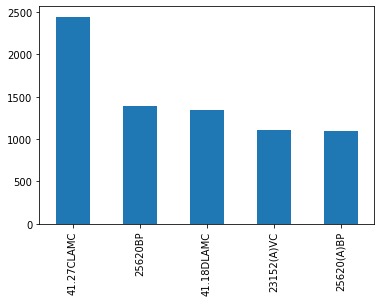

In [38]:
new_datasets['Charge'].value_counts().head().plot(kind='bar')

#### Q5. Felony arrest incidents have been dropping over the years. Using a trend line (linear estimation) for the data from 2010 and 2018 (inclusive), what is the projected number of felony arrests in 2019? Round to the nearest integer. Note, the data set includes arrests for misdemeanor, felonies, etc.

##### Disclaimer we select felony crime from our datasets but some crime can be classifed for both felony and misdemeanor

In [39]:
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Larceny')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Other Assaults')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Receive Stolen Property')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Driving Under Influence')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Prostitution/Allied')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Moving Traffic Violations')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Liquor Laws')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Drunkeness')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Disturbing the Peace')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Gambling')].index
data_2010to2018.drop(i,inplace =True)

In [40]:
data_2010to2018['Charge Group Description'].unique()

array(['Burglary', 'Robbery', 'Fraud/Embezzlement', 'Homicide',
       'Narcotic Drug Laws', 'Weapon (carry/poss)', 'Aggravated Assault',
       'Miscellaneous Other Violations', 'Vehicle Theft',
       'Against Family/Child', 'Forgery/Counterfeit',
       'Sex (except rape/prst)', 'Rape', 'Non-Criminal Detention',
       'Pre-Delinquency', 'Disorderly Conduct', 'Federal Offenses'],
      dtype=object)

In [42]:
felony_dataset=data_2010to2018.copy()
felony_dataset=felony_dataset[['year','Charge Group Description']]
felony_dataset

,year,Charge Group Description
0,2015,Burglary
6,2015,Burglary
7,2015,Robbery
12,2015,Robbery
160,2016,Fraud/Embezzlement
...,...,...
1227510,2018,Aggravated Assault
1227511,2018,Vehicle Theft
1227512,2018,Miscellaneous Other Violations
1227513,2018,Weapon (carry/poss)


In [43]:
lb= LabelEncoder()

In [44]:
felony_dataset['Charge Group Description'] = lb.fit_transform(felony_dataset['Charge Group Description'])

In [45]:
gkk= felony_dataset.groupby('year')['Charge Group Description'].sum().reset_index().sort_values('year',ascending=False)
gkk

,year,Charge Group Description
8,2018,123867
7,2017,452430
6,2016,464986
5,2015,482368
4,2014,547708
3,2013,613998
2,2012,657723
1,2011,695846
0,2010,732877


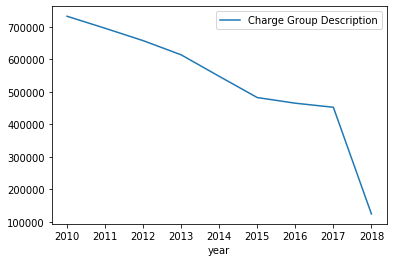

In [46]:
gkk.plot(x = "year", y = "Charge Group Description")

In [47]:
gkk

,year,Charge Group Description
8,2018,123867
7,2017,452430
6,2016,464986
5,2015,482368
4,2014,547708
3,2013,613998
2,2012,657723
1,2011,695846
0,2010,732877


In [48]:
gkk['year']=pd.to_datetime(gkk['year'])
gkk.set_index('year',inplace=True)

In [49]:
X = gkk.values
X

array([[123867],
       [452430],
       [464986],
       [482368],
       [547708],
       [613998],
       [657723],
       [695846],
       [732877]])

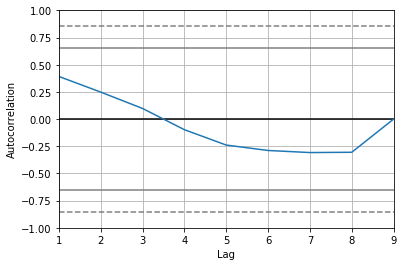

In [50]:
autocorrelation_plot(X)

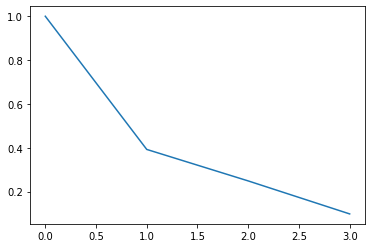

In [51]:
from statsmodels.tsa.stattools import acf,pacf
autor=acf(X,nlags=3)
par=pacf(X,nlags=3,method='ols')
pyplot.plot(autor,label='std')

In [52]:
import statsmodels.api as sms

In [53]:
model = sms.tsa.statespace.SARIMAX(X,order=(1,0,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -119.723
Date:                Mon, 05 Oct 2020   AIC                            243.447
Time:                        20:09:33   BIC                            243.841
Sample:                             0   HQIC                           242.595
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9761      0.048     20.359      0.000       0.882       1.070
sigma2      1.302e+10   1.29e-13   1.01e+23      0.000     1.3e+10     1.3e+10
Ljung-Box (L1) (Q):                   1.24   Jarque-

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

model = SARIMAX(X, order=(1, 3, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(X), len(X)+1)
print(yhat)

[765957.14041085 797733.89606344]


In [55]:
output = model_fit.forecast(4)[0]
print(output)

765957.1404108527


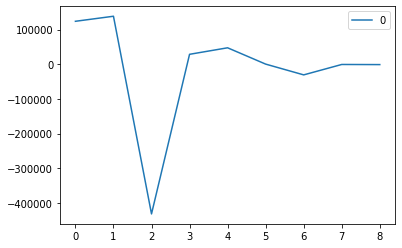

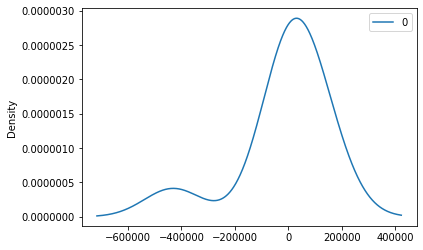

                   0
count       9.000000
mean   -13882.872781
std    166942.976314
min   -431486.210104
25%      -991.532822
50%       423.980072
75%     47446.353559
max    138410.778431


In [57]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

#### Autoregression (AR)

In [58]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [67]:
model=AR(X)
model_fit=model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      y   No. Observations:                    9
Model:                          AR(7)   Log Likelihood                  41.038
Method:                          cmle   S.D. of innovations              0.000
Date:                Mon, 05 Oct 2020   AIC                            -34.876
Time:                        20:12:24   BIC                            -40.757
Sample:                             0   HQIC                           -47.175
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.207e-07        nan        nan        nan         nan         nan
L1.y           0.2653        nan        nan        nan         nan         nan
L2.y           0.2452        nan        nan        nan         nan         nan
L3.y           0.2105        nan        nan        nan         nan         nan
L4.y           0.1833        nan        nan        nan         nan         nan
L5.y           0.1904        nan        nan        nan         nan         nan
L6.y           0.1866        nan        nan        nan         nan         nan
L7.y          -0.0468        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9331           -0.0000j            0.9331           -0.0000
AR.2           -1.3810           -0.0000j            1.3810           -0.5000
AR.3           -0.7900           -1.1110j            1.3632           -0.3484
AR.4           -0.7900           +1.1110j            1.3632            0.3484
AR.5            0.5065           -1.2358j            1.3356           -0.1881
AR.6            0.5065           +1.2358j            1.3356            0.1881
AR.7            5.0000           -0.0000j            5.0000           -0.0000
-----------------------------------------------------------------------------
"""

In [66]:
yhat = model_fit.predict(len(X), len(X)+1)
print(yhat)

[788496.13958016 852366.16875237]


In [60]:
model_fit.aic

-34.875911740054796

##### Q6.How many arrest incidents occurred within 2 km from the Bradbury Building in 2018? Use (34.050536, -118.247861) for the coordinates of the Bradbury Building . For simplicity, please use the spherical Earth projected to a plane equation for calculating distances. Use the radius of the Earth as 6371 km. Note, some arrest records are missing location data and the location is listed as (0, 0). These records should not factor in your calculation.

In [62]:
from math import sin,cos,sqrt,atan2,radians

In [63]:
def calculate_distance(coord):
    R=6371.0
    lat1=radians(34.050536)
    lon1=radians(-118.247861)
    lat2=radians(coord[0])
    lon2=radians(coord[1])
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a= sin(dlat/2)**2+ cos(lat1)+cos(lat2)+sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(a-1))

    distance = R*c
    return distance

In [64]:
calculate_distance

<function __main__.calculate_distance(coord)>

In [65]:
new_datasets["distance_Bradbury"]=new_datasets[(new_datasets['Location']!="(0,0)")&(pd.notna(new_datasets['Location']))]['Location'].apply(lambda x: calculate_distance([float(y) for y in x[1:-1].split(",")]))
new_datasets["distance_Bradbury"]

165        12855.513810
166        12854.544734
167        12853.631340
168        12853.016527
169        12851.503967
               ...     
1227511    12859.776084
1227512    12852.704395
1227513    12855.292409
1227514    12854.716998
1227515    12853.621412
Name: distance_Bradbury, Length: 30332, dtype: float64

#### How many arrest incidents were made per kilometer on Pico Boulevard during 2018? For this question, we will need to estimate the length of Pico Boulevard, which mostly stretches from east to west. To estimate the length of Pico Boulevard:u

In [68]:
##### How many arrest incidents were made per kilometer on Pico Boulevard during 2018? For this question, we will need to estimate the length of Pico Boulevard, which mostly stretches from east to west. To estimate the length of Pico Boulevard:

In [ ]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/